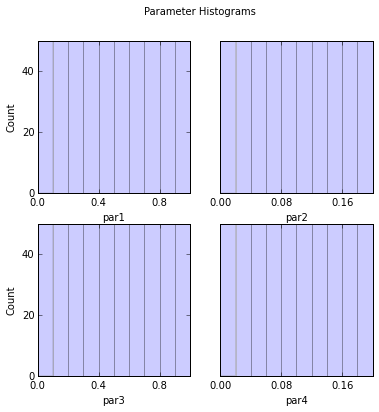



par1:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [20]:
# %load sampling_na.py
%matplotlib inline
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy
from scipy import arange, randn, exp
from multiprocessing import freeze_support

# Model function
def dbexpl(p):
    t=arange(0,100,20.)
    # Catch error, in this case a simple example
    # These could be failed model simulations
    if (p['par1']) < 0.5:
    #if (p['par1']+p['par3']) < 0.25:
        return [numpy.nan]*len(t)
    y =  (p['par1']*exp(-p['par2']*t) + p['par3']*exp(-p['par4']*t))
    return y

# Setup MATK model with parameters
p = matk.matk(model=dbexpl)
p.add_par('par1',min=0,max=1)
p.add_par('par2',min=0,max=0.2)
p.add_par('par3',min=0,max=1)
p.add_par('par4',min=0,max=0.2)
    
# Create LHS sample
s = p.lhs(siz=500, seed=1000)
    
# Look at sample parameter histograms, correlations, and panels
out = s.samples.hist(ncols=2,title='Parameter Histograms')

             par1     par2     par3     par4 
par1         1.00     0.00    -0.01    -0.01 
par2         0.00     1.00    -0.00     0.01 
par3        -0.01    -0.00     1.00     0.03 
par4        -0.01     0.01     0.03     1.00 


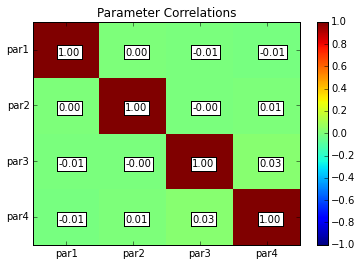

In [21]:
parcor = s.samples.corr(plot=True, title='Parameter Correlations')

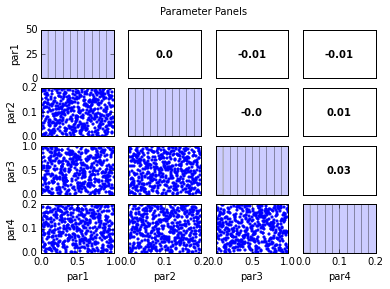

In [22]:
out = s.samples.panels(title='Parameter Panels')

In [23]:
# Run model with parameter samples
s.run( cpus=2, outfile='results.dat', logfile='log.dat',verbose=False)

array([[  1.20102380e+00,   1.10711918e-01,   1.54519180e-02,
          2.43673591e-03,   3.94147491e-04],
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,              nan,              nan,
                     nan,              nan],
       ..., 
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,              nan,              nan,
                     nan,              nan],
       [  1.25792755e+00,   2.18316358e-01,   4.39592143e-02,
          1.00887434e-02,   2.53278272e-03]])

In [24]:
    
# Look at sample response histograms, correlations, and panels
out = s.responses.hist(ncols=3,title='Model Response Histograms')

Error: Nan values exist probably due to failed simulations. Use subset (e.g. subset([('obs','!=',numpy.nan)]) to remove


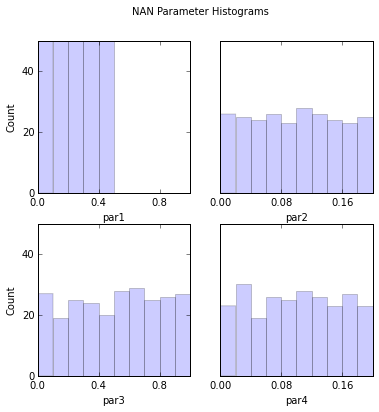



par1:
Count:           50       50       50       50       50        0        0        0        0        0 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
Count:           26       25       24       26       23       28       26       24       23       25 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
Count:           27       19       25       24       20       28       29       25       26       27 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
Count:           23       30       19       26       25       28       26       23       27       23 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [25]:
# Copy sampleset and subset to only samples with nan responses
snan = s.copy()
snan.subset(numpy.isnan, obs='obs1')
    
# Evaluate parameter combination resulting in nans
# Note that it is easy to identify that the culprit is par1 with values less than 0.5
out = snan.samples.hist(ncols=2,title='NAN Parameter Histograms')

             par1     par2     par3     par4 
par1         1.00     0.01     0.08     0.02 
par2         0.01     1.00    -0.03     0.01 
par3         0.08    -0.03     1.00     0.01 
par4         0.02     0.01     0.01     1.00 


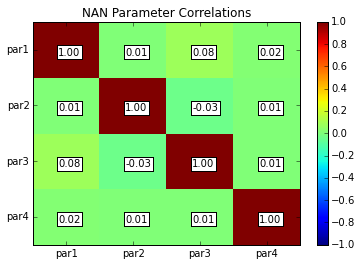

In [26]:
parcor = snan.samples.corr(plot=True, title='NAN Parameter Correlations')

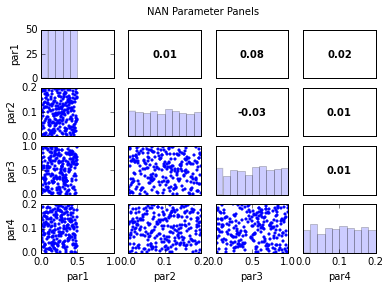

In [27]:
out = snan.samples.panels(title='NAN Parameter Panels')  